In [1]:
%matplotlib inline
# %matplotlib is a magic function in IPython. I'll quote the relevant documentation here for you to read for convenience:
# IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. It may be worth also reading How to make IPython notebook matplotlib plot inline for reference on how to use it in your code.
# If you want interactivity as well, you can use the nbagg backend with %matplotlib notebook (in IPython 3.x), as described here.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygmid import Lookup as lut
import os

***`Introduction`***
============================================
It is well known that the square-law MOS model is plagued by several limitations, especially when it comes to short-channel transistors: ​​ Modern MOSFETs are impaired by numerous mobility degradation effects, related to their short channel length, thin gate oxide and their generally more complex structure and doping profiles. In strong inversion, with gate overdrive voltages (VGS – VT) of several hundred millivolts, the error in the transconductance predicted by square-law models with constant parameters is of the order of 20–60%.  
  
In moderate inversion, with gate overdrive voltages below 150 mV, the square-law model breaks down altogether and it may be in error by a factor of two or even more. This deficiency applies to all MOSFETs, regardless of channel length. However, the issue has become more pronounced with short channel devices, since moderate inversion represents a design “sweet spot” for a variety of circuits in these technologies [3]–[5].  
  
In weak inversion (subthreshold operation), the current flows by diffusion (like in a BJT) and the square-law model must be replaced with an exponential I–V relationship.

## **`Before proceeding any further let's define the technology used below`**  
*By Default the Book 65nm models are used as to compare with the plots shown in the Book.*


In [3]:
filepath_dir = os.getcwd()
print(f"filepath_dir = {filepath_dir}")
str_technology = input("Please choose desired technology in nm: 65 (def), 180, 40, 28, 22) ")
str_vt = input('Please insert Vth flavor (svt, lvt, hvt): ')
str_mos_lib = input('Please insert MOS process (tt, ss or ff): ')
    
if str_technology == '180':
    filepath_dir = 'C:\\Users$\jruib$\OneDrive$\Documents\\Systematic_Analog_Design\\LUTs_180nm\\'
    device1 = f'180nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'180pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '40':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_40nm\\'
    device1 = f'40nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'40pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '28':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_28nm\\'
    device1 = f'28nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'28pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
elif str_technology == '22':
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_22nm\\'
    device1 = f'22nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'22pch_{str_vt}_mac_{str_mos_lib}_lib.mat'
else:
    filepath_dir = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\'
    device1 = f'65nch_{str_vt}_mac_{str_mos_lib}_lib.mat'
    device2 = f'65pch_{str_vt}_mac_{str_mos_lib}_lib.mat'

filepath_dir_fig = filepath_dir + 'plots_LUTs_python\\Book_Chap1'
if not os.path.exists(filepath_dir_fig):
    # if the folder directory is not present then create it.
    print("Creating figures/plots directory.")
    os.makedirs(filepath_dir_fig)


filepath_dir = c:\Users\jruib\OneDrive\Documents\GitHub\pygmid\Systematic_Analog_Design_LUTs\Chapter_1


### **`Chosen devices`**  

In [4]:
print(f"device1 = {device1}")
device1_LUT = filepath_dir+device1
print(f"device1_LUT = {device1_LUT}")

print(f"device2 = {device2}")
device2_LUT = filepath_dir+device2
print(f"device2_LUT = {device2_LUT}")
        
NCH = lut(device1_LUT)  # load MATLAB data into pygmid lookup object
PCH = lut(device2_LUT)  # load MATLAB data into pygmid lookup object       

device1 = 65nch_svt_mac_tt_lib.mat
device1_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65nch_svt_mac_tt_lib.mat
device2 = 65pch_svt_mac_tt_lib.mat
device2_LUT = C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\65pch_svt_mac_tt_lib.mat


In [5]:
str_save_Figs = input('Would you like to save the following Figures: (yes/no)')
if str_save_Figs == 'yes':
    save_Figs = True
    dpi = 600
else:
    save_Figs = False


In [6]:
VDSs = NCH['VDS']       # lookup object has pseudo-array access to data
W_lut = NCH['W']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']
VGSs = np.arange(0.4, 0.6, 0.05)
VGS_lut = NCH['VGS']
VBS_lut = NCH['VSB']

print(f"***********************************************")
print(f"VDSs = {VDSs}")
print(f"***********************************************")
print(f"W_LUT = {W_lut}")
print(f"***********************************************")
print(f"L_LUT = {L_lut}")
print(f"***********************************************")
print(f"VGS_LUT = {VGS_lut}")
print(f"***********************************************")
print(f"VBS_LUT = {VBS_lut}")
print(f"***********************************************")
print(f"dev_Temp = {dev_Temp}")
print(f"***********************************************")

***********************************************
VDSs = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********************************************
W_LUT = 10.0
***********************************************
L_LUT = [0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95 1.  ]
***********************************************
VGS_LUT = [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2  ]
***********

In [7]:
from pygmid import EKV_param_extraction, XTRACT

## **`Fig 1.1 - Current density of a minimum L NCH device Vs Vgs`**  
*Dotted vertical line corresponds to device threshold voltage, $V_{th}$.*



In [8]:
# % Fig. 1.1 compare JD to strong and weak inversion approximation
L = L_Min
rho = 0.6
step = 0.001
VGS = np.arange(0, 1.2+step, step)
VDS = 1.0
UT  = .026

# L   =   kwargs.get('L', min(lk['L']))
# VDS =   kwargs.get('VDS', lk['VDS'])
# VSB =   kwargs.get('VSB', 0.0)
# rho =   kwargs.get('rho', 0.6)
# UDS =   kwargs.get('UDS', np.arange(0.025, 1.2+0.025, 0.025))

# % compute ------------------------
# JD = lookup(nch,'ID_W','VGS',VGS,'VDS',VDS,'L',L);
JD = NCH.look_up('ID_W', VGS=VGS, VDS=VDS, L=L)
print(f"JD max = {JD.max()} \n")
# % EKV ===============================================
# % XTRACT INPUTS =====================================
# % L, VSB are scalars
# % VDS scalar or column vector
# % rho reference        (optional scalar)
# VDS = np.array([[1.0], [0.6]])
# VDS = np.array([1.0, 0.6])
# VDS = np.array([1.0])
# y_EKV  = XTRACT(NCH,L,VDS,0,rho)
# y = [VDS, n, VT, Js, d1n, d1VT, d1logJS, d2n, d2VT, d2logJS]

(VDS_EKV, n_EKV, VT_EKV, JS_EKV, d1n_EKV, d1VT_EKV, d1logJS_EKV, d2n_EKV, d2VT_EKV, d2logJS_EKV) = EKV_param_extraction(NCH, 1, L = L, VDS = VDS, VSB = 0.0, rho=rho)

# % XTRACT OUTPUTS =====================================
# % y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS];
print("\t\t\tEKV XTRACT Function\n\n")
print("y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]\n")
print("n --> subthreshold slope factor, VT --> threshold voltage,\n")
print("JS --> Specific current density ( Is when W = 1um)\n")
print("remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.\n")

print(f"EKV_param_extraction: VDS = {VDS_EKV}")
print(f"EKV_param_extraction: n = {n_EKV}")
print(f"EKV_param_extraction: VT = {VT_EKV}")
print(f"EKV_param_extraction: JS = {JS_EKV}")
print(f"EKV_param_extraction: d1n = {d1n_EKV}")
print(f"EKV_param_extraction: d1VT = {d1VT_EKV}")
print(f"EKV_param_extraction: d1logJS = {d1logJS_EKV}")
print(f"EKV_param_extraction: d2n = {d2n_EKV}")
print(f"EKV_param_extraction: d2VT = {d2VT_EKV}")
print(f"EKV_param_extraction: d2logJS = {d2logJS_EKV}")

JD max = 0.0005879175684970695 



			EKV XTRACT Function


y = [VDS n VT JS d1n d1VT d1logJS d2n d2VT d2logJS]

n --> subthreshold slope factor, VT --> threshold voltage,

JS --> Specific current density ( Is when W = 1um)

remaining parameters are the sensitivities of each parameter to Vds, 1st and 2nd derivatives.

EKV_param_extraction: VDS = 1.0
EKV_param_extraction: n = 1.4685897014107934
EKV_param_extraction: VT = 0.4654402135940595
EKV_param_extraction: JS = 8.10057017289147e-06
EKV_param_extraction: d1n = -0.004606872996134723
EKV_param_extraction: d1VT = -0.07761006737031541
EKV_param_extraction: d1logJS = 0.1733718523876439
EKV_param_extraction: d2n = 0.016203663259517626
EKV_param_extraction: d2VT = 0.013883608770815008
EKV_param_extraction: d2logJS = 14.770932497839443


In [9]:
# JS_EKV = y_EKV[3] # % Specific current density ( Is when W = 1um)
# t_EKV_lookup = pd.DataFrame({"n": float(n_EKV), "VT": float(VT_EKV), "JS": float(JS_EKV)})
t_EKV_lookup = pd.DataFrame({"VDS": VDS_EKV, "n": n_EKV, "VT (mV)": VT_EKV*1e3, "JS (uA/um)": JS_EKV*1e6}, index = ['EKV'])
print(f"")
print(f"*******************\n")
print(t_EKV_lookup)

# % strong inversion ==========
# IS = 2*n*UT^2 * un*Cox*W/L = (2*n*UT^2)*Beta
beta = JS_EKV/(2*n_EKV*UT**2)
GVO  = (VGS-VT_EKV)
M    = GVO >=0
JDsi  = beta*GVO[M]**2/(2*n_EKV)

# # ************* Testing operation above with smaller array ************
# VGS_t = np.arange(0, 0.7+0.05, 0.05)
# GVO_t  = (VGS_t-VT_EKV)
# GVO_t.shape
# M_t = GVO_t>=0
# JDsi_t  = beta*GVO_t[M_t]**2/(2*n_EKV)
# # ************* Testing operation above with smaller array ************

# % weak inversion ============
Jo  = JS_EKV*np.exp(2 - VT_EKV/(n_EKV*UT))
JDwi = Jo*np.exp(VGS/(n_EKV*UT))


*******************

     VDS        n     VT (mV)  JS (uA/um)
EKV  1.0  1.46859  465.440214     8.10057


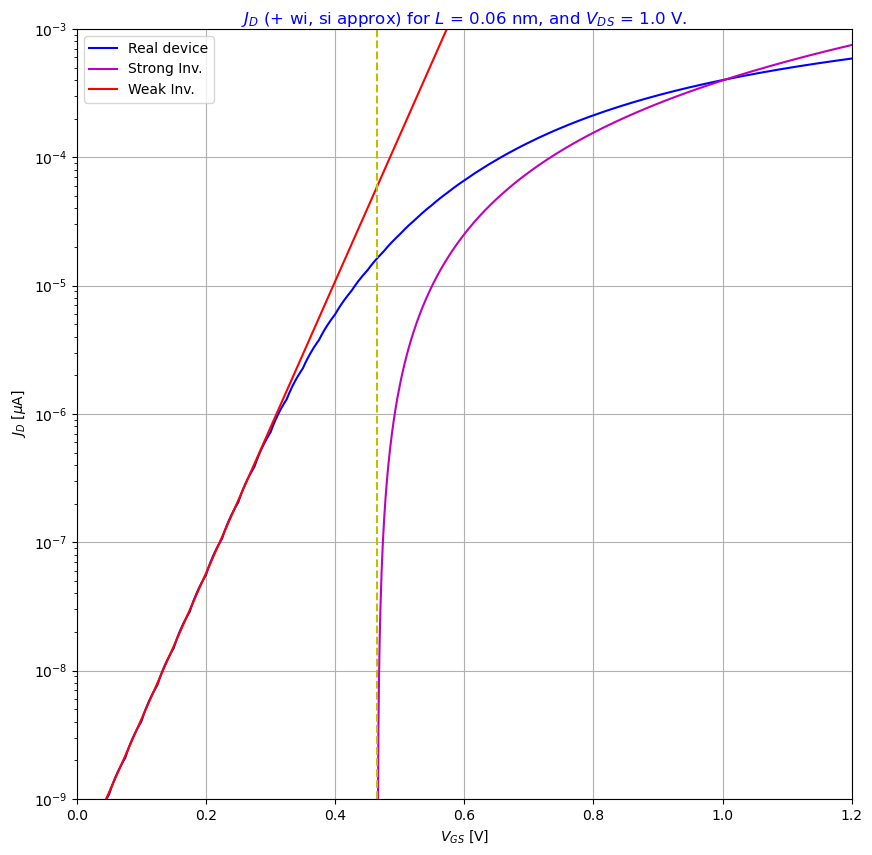

In [10]:
# % plot ======================
# plt.rcdefaults
# plt.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
# plt.figure()
fig, axs = plt.subplots(1,1,figsize=(10,10))

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

label1 = 'Real device'
label2 = 'Strong Inv.'
label3 = 'Weak Inv.'

# plt.semilogy(VGS,JD,'b', VGS[M],JDsi,'m', VGS,JDwi,'r')
axs.semilogy(VGS,JD,'b', label = label1)
# plt.grid(True)
axs.grid(True)
axs.semilogy(VGS[M],JDsi,'m',label = label2)
axs.semilogy(VGS,JDwi,'r', label = label3)
axs.semilogy(VT_EKV*[1, 1], [1e-9, 1e-3],'y--')

# plt.xlim([0, 1.2])
# plt.ylim([1e-9, 1e-3])
axs.set_ylim(bottom=1e-9, top=1e-3)
axs.set_xlim(left=0, right=1.2)

axs.set_ylabel(r"$J_D$ [$\mu$A]")
axs.set_xlabel(r"$V_{GS}$ [V]")
# axs[0].set_xscale("linear")
# axs[0].set_xscale("log")

# plt.ylabel(r"$J_D$ [$\mu$A]")
# # plt.ylabel(r"$I_D$ [$\mu$A]")
# plt.xlabel(r"$V_{GS}$ [V]")

# plt.title(f'$J_D$ (+ wi, si approx) for $L$ = {L} nm, and $V_D$$_S$ = {float(VDS)} V.')
axs.set_title(f'$J_D$ (+ wi, si approx) for $L$ = {L} nm, and $V_D$$_S$ = {VDS} V.', title_dict)
# loc: The location of the legend.
# 'upper left', 'upper right', 'lower left', 'lower right'
# 'upper center', 'lower center', 'center left', 'center right'
# 'best'
# plt.legend(loc = 'upper left')
axs.legend(loc = 'upper left')

if save_Figs:
    dpi = 600
    fig_JD_Vgs_1_1 = filepath_dir_fig + f'\\Fig_1_1_JD_Vs_Vgs_max_JD_{np.max(JD)*1e6:.1f}_uA_um_pygmid'
    plt.savefig(fig_JD_Vgs_1_1 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

In [11]:
print(f"VGS = {VGS} \n")
print(f"JD = {JD} \n")
print(f"VGS ndim = {np.ndim(VGS)} \n")
print(f"VGS shape = {np.shape(VGS)} \n")
print(f"JD ndim = {np.ndim(JD)} \n")
print(f"JD shape = {np.shape(JD)} \n")

VGS = [0.000e+00 1.000e-03 2.000e-03 ... 1.198e+00 1.199e+00 1.200e+00] 

JD = [2.93341050e-10 3.04143475e-10 3.14945899e-10 ... 5.86078825e-04
 5.86998197e-04 5.87917568e-04] 

VGS ndim = 1 

VGS shape = (1201,) 

JD ndim = 1 

JD shape = (1201,) 



### **`Book 65nm Fig1.1`**  

In [12]:
from IPython.core.display import Image

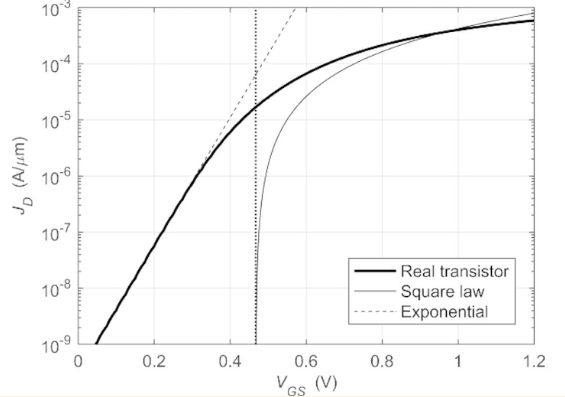

In [13]:
filepath_Book_65nm_figs = 'C:\\Users\\jruib\\OneDrive\\Documents\\Systematic_Analog_Design\\LUTs_65nm\\plots_LUTs_python\\Book_Chap1\\'
fig_1_1_65nm = filepath_Book_65nm_figs + 'Book_Fig_1_1.png'
Image(fig_1_1_65nm, width=800, height=800)

**`Fig1.1 Summary`**  
The above-stated issues are clearly visible in Figure 1.1, which shows the current density plot of a realistic 65-nm transistor, together with exponential and square-law approximations.  
  
The exponential provides a reasonably good fit for very low VGS (weak inversion) and the quadratic approximation begins to make sense a few hundred millivolts above the device’s threshold voltage (vertical dashed line).  
  
The transition from weak to strong inversion should ideally be smooth and continuous, but finding a physical relationship that bridges the exponential and square-law approximations turns out to be non-trivial.  
  
In addition, at very large VGS, the current density of the real device and the quadratic model diverge again due to the mentioned mobility degradation effects.

## **`Book Design approach to Analog Circuit Sizing Problem`**  
The design approach described in this book falls under the category of full design handcrafting (FDH) [8]. It builds on classical hand analysis methods and eliminates the gap between hand analysis and complex transistor behavior using SPICE-generated lookup tables (see Figure 1.3).  
  
The tables contain the transistor’s equivalent small-signal parameters (gm, gds, etc.) across a multi-dimensional sweep of the MOSFET’s terminal voltages. Since using the lookup table data closely captures the behavior of the SPICE model, the approximation issues of Figure 1.2 (Square-Law) are eliminated and it is possible to achieve close agreement between the desired specs and the simulated performance without iterative tweaking.  
Though in some cases the calculations can literally be done by hand, it is usually more efficient to implement the design flow through a computer script.  
In this book, we chose the popular Matlab® environment for designing such scripts.


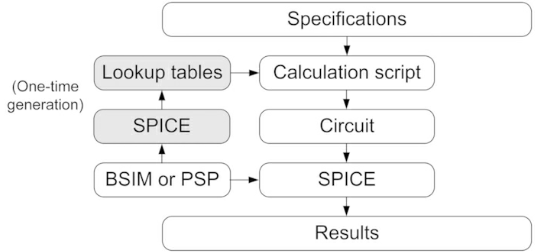

In [14]:
fig_1_3_65nm = filepath_Book_65nm_figs + 'Book_Fig_1_3.png'
Image(fig_1_3_65nm, width=800, height=800)

To implement the design flow of Figure 1.3, we need the following ingredients: ​​

 * A convenient way to generate and access the lookup table data. The generation of the proposed lookup table format is described in Appendix 2.  ​​ 

    * Examples on how to access and use the stored data are given throughout this book (including an introductory example in Section 1.2.2).  
   
 * A suitable way to translate the design problem into a script that helps us study the key tradeoffs and ultimately computes the final device sizes. Most of this book is dedicated to this part of the flow.   
    * By means of examples, we study design problems of varying complexity and the derived scripts can form the basis for future design problems that the reader will encounter.

**`A key aspect of the proposed methodology is that we interpret and organize the lookup table data based on the transistor’s inversion level, employing the transconductance efficiency gm/ID as a proxy, and key parameter for design.`**  

This metric captures a device’s efficiency in translating bias current to transconductance and spans nearly the same range in all modern CMOS processes (~3…30 S/A). When combined with other figures of merit (gm/Cgg, gm/gds, etc.), thinking in terms of gm/ID allows us to study the tradeoffs between bandwidth, noise, distortion and power dissipation in a normalized space.  
  
**`The final bias currents and device sizes follow from a straightforward de-normalization step using the current density (ID/W).`** 

## **`Fig. 1.6 gm/ID and gm/W for L = 60 nm (VDS = 1 V and VSB = 0 V)`**  
*Prediction using the Square-Law approximations:*

 * $ g_m/I_D = 2 / V_{OV} $  

 * $ g_m/W =  \frac{\mu * C_{ox}}{L} V_{OV}$
  
`Sidenote:`
(Example of Integral using Latex)
$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$

In [15]:
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']

L   = L_Min
rho = 0.6
step = 0.001
VDS = 1.0
VSB = 0.0

# % compute ==============
# ******** VOV ***********
VOV = VGS_lut - NCH.look_up('VT', VDS=VDS, L=L)
# NCH.look_up('VT', VGS=0.001,VDS=VDS, L=L)
print(f"VOV shape --> {VOV.shape}")
# VGS = np.arange(0, 1.2+step, step)
VOVf = np.linspace(np.finfo(float).eps, 0.8)
# Real Device gm/ID and gm/W
gm_ID = NCH.look_up('GM_ID', L=L, VDS=VDS)
gm_W = NCH.look_up('GM_W', L=L, VDS=VDS)

# Square-Law approximation
gm_ID_sq_law = 2/VOVf
# gm_W_sq_law = u*Cox/L*VOVf
# un*Cox = Kn = 50 uA/V^2
u_Cox_ov_Lmin = 2.22e-3
gm_W_sq_law = u_Cox_ov_Lmin*VOVf 

VOV shape --> (49,)


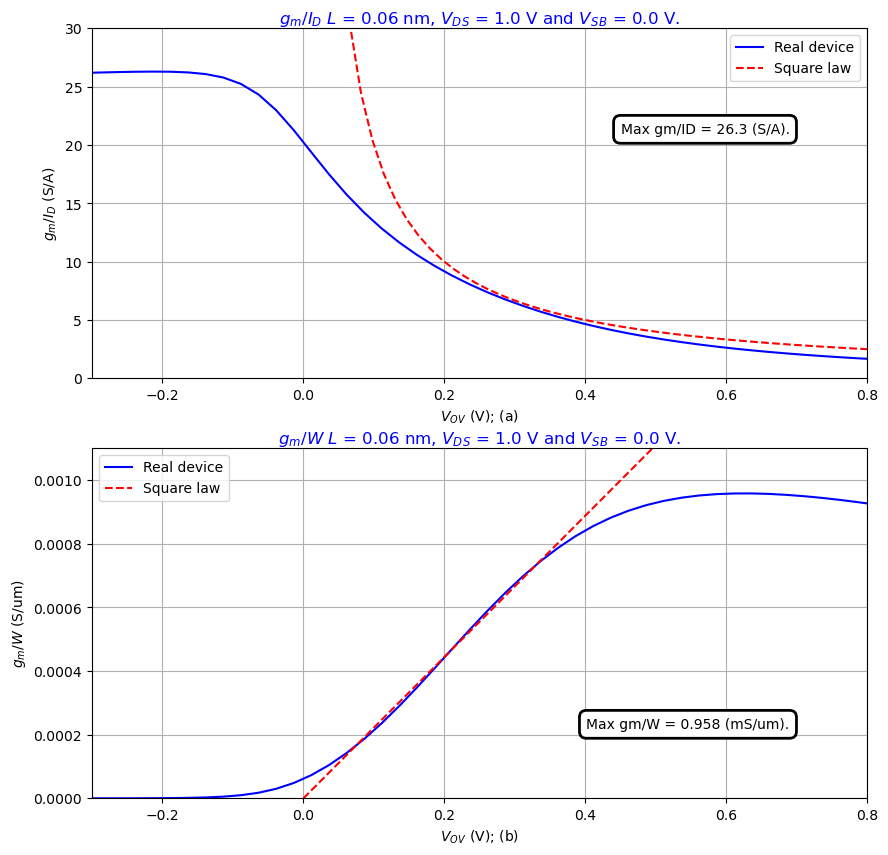

In [16]:
# plt.style.use('classic')
# plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(2,1,figsize=(10,10))
# axs.set_facecolor("white")
label1 = 'Real device'
label2 = 'Square law'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

axs[0].plot(VOV, gm_ID, 'b-', label = label1)
axs[0].grid(True)
axs[0].set_ylabel(f'$g_m$/$I_D$ (S/A)')
axs[0].set_xlabel(f'$V_O$$_V$ (V); (a)')

axs[0].plot(VOVf, gm_ID_sq_law, 'r--', label = label2)

axs[0].set_ylim(bottom=0, top=30)
axs[0].set_xlim(left=-0.3, right=0.8)
# axs[0].set_xscale("linear")
# axs[0].set_xscale("log")
axs[0].legend()

res_str_gmID = f'Max gm/ID = {np.max(gm_ID):0.1f} (S/A).'
axs[0].annotate(res_str_gmID,
             ((0.9), (0.7)), # these are the coordinates to position the label
             xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
             color='black',
             bbox=bbox_props,
             ha='right') # center, left, right
axs[0].set_title(f'$g_m$/$I_D$ $L$ = {L} nm, $V_D$$_S$ = {VDS} V and $V_S$$_B$ = {VSB} V.', title_dict)

# **************************************************************
# **************************************************************

axs[1].plot(VOV, gm_W, 'b-', label = label1)
axs[1].grid(True)

axs[1].set_ylabel(f'$g_m$/$W$ (S/um)')
axs[1].set_xlabel(f'$V_O$$_V$ (V); (b)')

axs[1].plot(VOVf, gm_W_sq_law, 'r--', label = label2)

axs[1].set_ylim(bottom=0, top=1.1e-3)
axs[1].set_xlim(left=-0.3, right=0.8)
axs[1].legend()

res_str_gmW = f'Max gm/W = {np.max(gm_W)*1e3:.3f} (mS/um).'
axs[1].annotate(res_str_gmW,
             ((0.9), (0.2)), # these are the coordinates to position the label
             xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
             color='black',
             bbox=bbox_props,
             ha='right') # center, left, right
axs[1].set_title(f'$g_m$/$W$ $L$ = {L} nm, $V_D$$_S$ = {VDS} V and $V_S$$_B$ = {VSB} V.', title_dict)

if save_Figs:
    dpi = 600
    fig_gmID_gmW_1_6 = filepath_dir_fig + f'\\Fig_1_6_gmID_gmW_Vs_VOV_max_gmID_{np.max(gm_ID):.1f}_pygmid'
    plt.savefig(fig_gmID_gmW_1_6 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

## `Refresher - Willy Sansen`

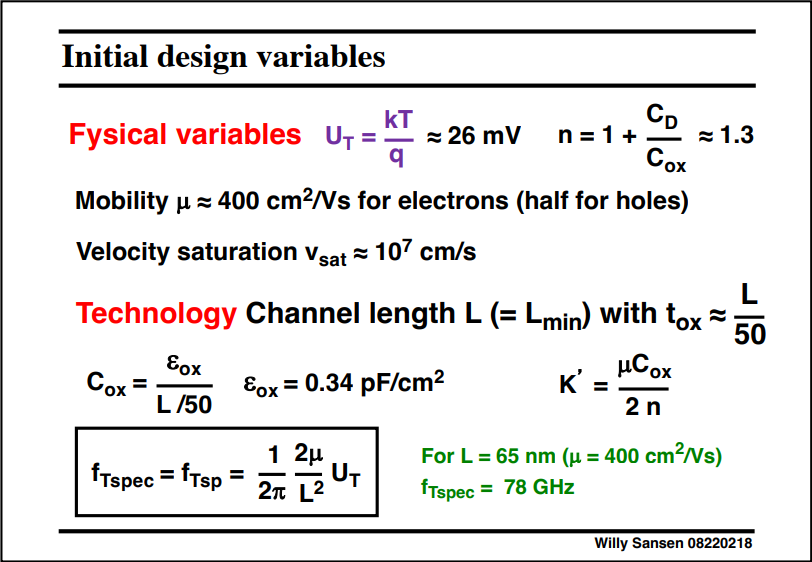

In [17]:
fig_WS_InitVars_65nm = filepath_Book_65nm_figs + 'WS_Initial_Design_Variables.png'
Image(fig_WS_InitVars_65nm, width=800, height=800)

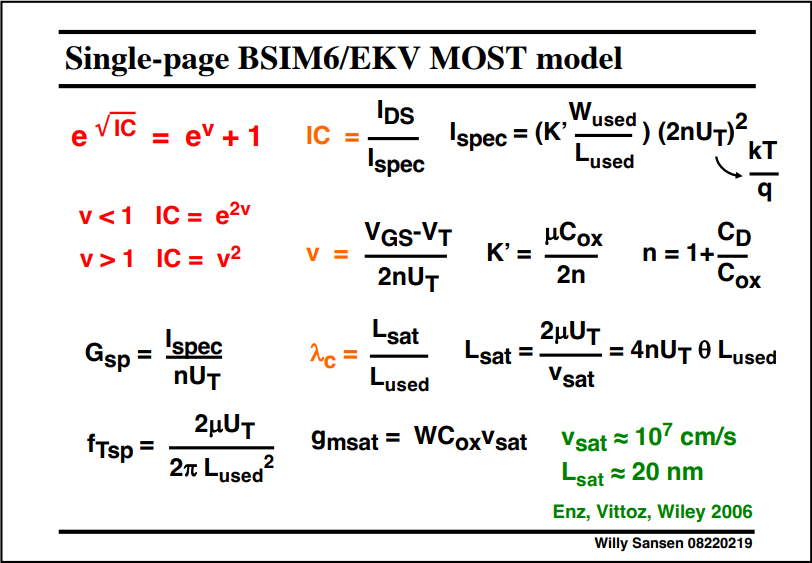

In [18]:
fig_WS_EKV_1page_65nm = filepath_Book_65nm_figs + 'WS_Single_Page_BSIM6_EKV_Most_Model.png'
Image(fig_WS_EKV_1page_65nm, width=800, height=800)

## `Capturing the Tradeoffs using Lookup Tables`
  
*This book advocates lookup tables to quantify the tradeoff between the relevant device figures of merit in each design (including, but not limited to gm/ID and gm/W). The lookup tables can be generated (once) using a SPICE-like circuit simulator and the data can be stored in a file for future use (see Appendix 2).*  

This is illustrated in Figure 1.7.  
Starting with a “well-calibrated” model file from the silicon foundry, we perform DC sweeps (and noise simulations) in four dimensions (L, VGS, VDS and VSB) and tabulate all relevant device parameters along these sweeps for a fixed device width W. While one could in principle include the device width as a fifth sweep variable, this is not necessary since the parameters scale (approximately) linearly with W across the typical range encountered in analog design. We validate this important assumption of width independence for parameters like gm/ID, gm/W, etc., in Appendix 3.  
The sweeps can be repeated for all devices offered by a given foundry, leading to one lookup table per transistor type. 
`With this flow, the quality of the lookup table data is of course directly linked to the quality of the foundry models. If the foundry models are poor, it will be challenging to produce a working circuit altogether, independent of which tool set and sizing methodology is used.`  
Model quality assurance is therefore outside the scope of this book.  
`However, proper inspection of the lookup table data (leveraging the physical intuition conveyed in Chapter 2) can sometimes expose modeling issues. For example, the shape of the gm/ID curve in Figure 1.6 may reveal discontinuities, improper location of the weak inversion plateau, etc.` 

Figure 1.7


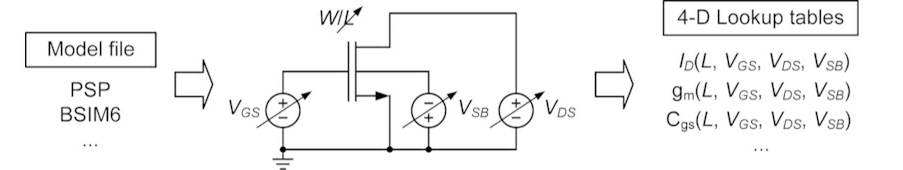

In [19]:
print(f"Figure 1.7")
fig_Book_1_7_65nm = filepath_Book_65nm_figs + 'Book_Fig_1_7.png'
Image(fig_Book_1_7_65nm, width=800, height=800)

**`Figure 1.7 Lookup table generation using a four-dimensional SPICE sweep. The width W is set to 10 μm (5 fingers, 2 μm each) for the lookup tables used in this book.`**  
  
To make the lookup table data easily accessible in Matlab, we have created a function (called “lookup”) that allows us to read all transistor model parameters as a function of the applied bias voltages (with interpolation capabilities). Further details on this function are found in Appendix 2. To give the reader a basic feel for its usage, we provide two simple examples from the Matlab command line:

In [20]:
ID = NCH.look_up('ID', VGS=0.7, VDS=0.5, VSB=0, L=0.06)
Cgs = NCH.look_up('CGS', VGS=0.7, VDS=0.5, VSB=0, L=0.06)
W_dev = NCH['W']
print(f"ID = {ID*1e6:.2f} uA \n")
print(f"Cgs = {Cgs*1e15:.4f} fF \n")
print(f"W_dev = {W_dev} um \n")

ID = 931.27 uA 

Cgs = 7.0461 fF 

W_dev = 10.0 um 



**`Once these lookup tables have been generated, the remaining question is: how should the designer organize and use the data to gain insight into circuit sizing tradeoffs?`**  
  
To answer this question, we return to the differential pair example, which established a fundamental tradeoff between gm/ID and gm/W. *`A key concept advocated in this book is to eliminate VOV as a design variable altogether and instead link all design tradeoffs to the choice of gm/ID, which (like VOV) can be viewed as a proxy for the device’s inversion level.`*  
  
As explained further in Chapter 2, gm/ID ranges from about 3…30 S/A in all modern CMOS technologies, where the lower end corresponds to strong inversion, the mid-range (around 12…18 S/A) amounts to moderate inversion, and the peak value is linked to weak inversion. 
*`In addition to indicating the inversion level, gm/ID is a useful figure of merit for another reason, as we have already discovered in our differential pair example. It directly quantifies the transconductance per unit of current invested in the device. Therefore, we advocate the unit of S/A (instead of 1/V).`*  

## **`1.8 gm/W versus gm/ID for L = 60 nm`**  
With VOV eliminated, and instead using $\frac {gm}{I_D}$, the sizing tradeoff for our differential pair example is elegantly captured in a single plot, shown in Figure 1.8.  
  
**`Picking a small gm/ID means that we end up with a large gm/W, implying a small device for a desired value of gm. The opposite is true when we opt for a large value of gm/ID, where the device will be wider, at the benefit of reduced current.`**  

Note that the quantities plotted in Figure 1.8 can be extracted from the lookup table data introduced above. Each point of the tradeoff curve corresponds to a different VGS value in the sweep. However, the exact value of VGS for the desired tradeoff point (the chosen $gm/I_D$) tends to be secondary from an optimization perspective.  
  
*`In our example, we only care about how much current and area we are investing to realize a certain value of gm. More generally, we will in fact see throughout this book that width-independent parameters play a fundamental role in systematic tradeoff studies and circuit sizing.`* 

In [21]:
# % data ===============
VGS_lut = NCH['VGS']
L_lut = NCH['L']
L_Min = min(L_lut)
dev_Temp = NCH['TEMP']

L   = L_Min
rho = 0.8
step = 0.001
VDS = 1.0
VSB = 0.0

# % compute ==============
step = 0.1
gm_ID = np.arange(3, 26+step, step)
gm_W = NCH.look_up('GM_W', GM_ID=gm_ID, L=L, VDS=VDS)

Save Figure: C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\plots_LUTs_python\Book_Chap1\Fig_1_8_gmW_Vs_gmID_pygmid


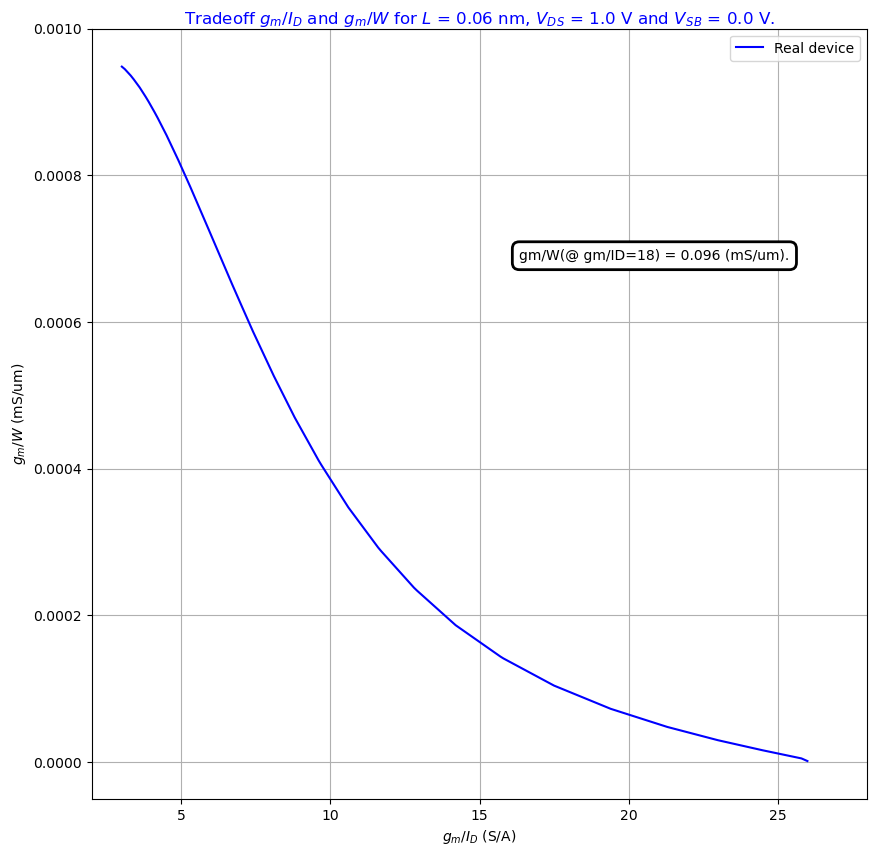

In [22]:
# % plot ====================
# plt.style.use('classic')
# plt.rcParams.update(plt.rcParamsDefault)
fig, axs = plt.subplots(1,1,figsize=(10,10))
# axs.set_facecolor("white")
label1 = 'Real device'
label2 = 'Square law'

title_dict = dict(fontsize=12, fontweight=2, color="blue", verticalalignment='center', horizontalalignment='center')
# Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)[source]
bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)

# plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

axs.plot(gm_ID, gm_W, 'b-', label = label1)
axs.grid(True)
axs.set_ylabel(f'$g_m$/$W$ (mS/um)')
axs.set_xlabel(f'$g_m$/$I_D$ (S/A)')

axs.set_xlim(left=2, right=28)
axs.set_ylim(bottom=-0.05e-3, top=1e-3)

# axs.set_xscale("linear")
# axs.set_xscale("log")
axs.legend()

gm_W_gmID_18 = NCH.look_up('GM_W', GM_ID=18, L=L, VDS=VDS)
res_str_gmW = f'gm/W(@ gm/ID=18) = {gm_W_gmID_18*1000:0.3f} (mS/um).'
axs.annotate(res_str_gmW,
             ((0.9), (0.7)), # these are the coordinates to position the label
             xycoords='axes fraction',  # 'data' ; 'axes fraction' ; 'figure pixels'
             color='black',
             bbox=bbox_props,
             ha='right') # center, left, right
axs.set_title(f'Tradeoff $g_m$/$I_D$ and $g_m$/$W$ for $L$ = {L} nm, $V_D$$_S$ = {VDS} V and $V_S$$_B$ = {VSB} V.', title_dict)

if save_Figs:
    dpi = 600
    # fig_gmID_gmW_1_6 = filepath_dir_fig + f'\\Fig_1_6_gmID_gmW_Vs_VOV_max_gmID_{np.max(gm_ID):.1f}'
    fig_gmW_gmID_1_8 = filepath_dir_fig + f'\\Fig_1_8_gmW_Vs_gmID_pygmid'
    print(f"Save Figure: {fig_gmW_gmID_1_8}")
    plt.savefig(fig_gmW_gmID_1_8 + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

In [23]:
gm_W_book = NCH.look_up('GM_W', GM_ID=10, VDS=0.5, VSB=0, L=0.06)
print(f"gm_W = {gm_W_book*1e6:.2f} uS/um \n")

gm_W = 354.28 uS/um 



## **`Table 1.1 Figure of Merit Table for an n-channel device with L=60 nm, VDS = 1 V & VSB = 0 V`**  
  
**It turns out that gm/ID not only controls gm/W, but also a variety of other width-independent quantities that analog circuit designers care about.**

**`We therefore promote gm/ID as “the” knob for analog design, like the way VOV has played a central role in square-law design.`**

In [24]:
# skip this, this is just to display nice tables.
from itertools import zip_longest
class Table(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                try:
                    float(col)
                    html.append("<td>%.3f</td>" % col)
                except(ValueError):
                    html.append("<td><b>%s</b></td>" % col)
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [25]:
# Compute FOM results
step = 5
gm_ID_t_n = np.arange(5, 20+step, step)
# Ls = np.arange(min(NCH['L']),0.3,0.05)
Ls = L_Min
# Ls = L_lut
VDS=1.0

gm_W_t_n = NCH.look_up('GM_W', GM_ID=gm_ID_t_n, L=Ls, VDS=VDS)
ID_W_t_n = NCH.look_up('ID_W', GM_ID=gm_ID_t_n, L=Ls, VDS=VDS)
GM_GDS_t_n = NCH.look_up('GM_GDS', GM_ID=gm_ID_t_n, L=Ls, VDS=VDS)
ft_t_n = NCH.look_up('GM_CGG', GM_ID=gm_ID_t_n, VDS=VDS)/(2*np.pi)

gm_ID_5 =  [gm_ID_t_n[0], Ls*1e3, VDS, gm_W_t_n[0]*1e3, ID_W_t_n[0]*1e6,  GM_GDS_t_n[0],  ft_t_n[0]*1e-9]
gm_ID_10 = [gm_ID_t_n[1], Ls*1e3, VDS, gm_W_t_n[1]*1e3, ID_W_t_n[1]*1e6,  GM_GDS_t_n[1],  ft_t_n[1]*1e-9]
gm_ID_15 = [gm_ID_t_n[2], Ls*1e3, VDS, gm_W_t_n[2]*1e3, ID_W_t_n[2]*1e6,  GM_GDS_t_n[2],  ft_t_n[2]*1e-9]
gm_ID_20 = [gm_ID_t_n[3], Ls*1e3, VDS, gm_W_t_n[3]*1e3, ID_W_t_n[3]*1e6,  GM_GDS_t_n[3],  ft_t_n[3]*1e-9]

res_np = np.array([gm_ID_5, gm_ID_10, gm_ID_15, gm_ID_20])

# pd_Iaccu_IMonCodeLSB = pd.DataFrame({"Iaccu_t_mA": bsocIaccu_sweep_mA_rep_l, "measIaccu_t_mA_b": measbsocIaccu_sweep_mA_b_rep_l, "meas_bsocIMonCode_LSB": meas_bsocIMonResult_testCode_lsb_l})
# To access column 0: test[:, 0]
# To access row 0: test[0, :]
fom_Results = pd.DataFrame({"gm_ID": res_np[:, 0], "L (nm)": res_np[:, 1], "VDS": res_np[:, 2], "gm_W (mS/um)": res_np[:, 3], "ID_W (uA/um)": res_np[:, 4], "gm_Gds": res_np[:, 5], "fT_GHz": res_np[:, 6]})

print(fom_Results)


   gm_ID  L (nm)  VDS  gm_W (mS/um)  ID_W (uA/um)     gm_Gds      fT_GHz
0    5.0    60.0  1.0      0.811267    162.624103   9.879507  121.531294
1   10.0    60.0  1.0      0.385447     38.756182  10.919021   64.337775
2   15.0    60.0  1.0      0.163804     11.026206  11.461937   29.691239
3   20.0    60.0  1.0      0.064771      3.270036  11.863094   12.823422


In [26]:
t = Table()
ilabels = ['#1', '#2', '#3', '#4']
t.append(['Coefficients', 'gm/ID', 'L (nm)', 
          'VDS', 'gm/W (mS/um)', 'ID/W (uA/um)', 'gm/Gds', 'fT (GHz)'])
# t.append(['', 'gm_ID5', 'gm_ID10', 'gm_ID15', 'gm_ID20'])
Ls_l = np.array([Ls, Ls, Ls, Ls])
VDS_l = np.array([VDS, VDS, VDS, VDS])
[t.append(x) for x in zip_longest(ilabels, gm_ID_t_n.tolist(), (Ls_l*1e3).tolist(), VDS_l.tolist(), 
    (gm_W_t_n*1e3).tolist(), (ID_W_t_n*1e6).tolist(), GM_GDS_t_n.tolist(), (ft_t_n*1e-9).tolist() ,fillvalue="")]
t

Coefficients,gm/ID,L (nm),VDS,gm/W (mS/um),ID/W (uA/um),gm/Gds,fT (GHz)
#1,5.000,60.000,1.000,0.811,162.624,9.880,121.531
#2,10.000,60.000,1.000,0.385,38.756,10.919,64.338
#3,15.000,60.000,1.000,0.164,11.026,11.462,29.691
#4,20.000,60.000,1.000,0.065,3.270,11.863,12.823


  
**`Table 1.1 provides a (non-exhaustive) preview of the kinds of metrics that we will consider in this book. The first Result column in this table is gm/W, which we have already discussed. Making gm/ID large means that gm/W deteriorates. The next column is the current density of the transistor, ID/W. The current density simply quantifies how many microamps per micron we must inject into the device to operate at the desired inversion level (represented by gm/ID). We will typically use this parameter in the other direction, i.e. given gm/ID, we can compute how wide the device must be to produce a certain gm (see sizing example below). Obviously, gm/W contains the same info, and so it is purely a matter of taste which parameter is used for sizing. Most designers prefer to think in terms of current density (JD = ID/W), since this quantity also has important implications for long-term reliability (electromigration, etc.).`**  

**The last two columns offer performance parameters related to gain and bandwidth. The transistor’s intrinsic voltage gain $gm/gds$ becomes larger as we push the device toward weak inversion. Unfortunately, at the same time, the device’s transit frequency ($f_T = \frac {gm}{2 \pi C_{gg}}$, defined more formally in Chapter 2) decreases significantly. In many circuits, operating the transistors at lower fT translates into a bandwidth reduction.**
  
As a simple example, we will show in Chapter 3 that the gain-bandwidth product (GBW) of a gain stage scales directly with fT, assuming a fixed “fan-out” (ratio of load to input capacitance). Similarly, we will see in the examples of Chapters 5 and 6 that the non-dominant poles of feedback amplifiers tend to occur at a fraction of fT, thus also limiting the gain-bandwidth product via stability constraints.

**`Greek Symbols`**  
$\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\zeta$, $\eta$, $\theta$, $\iota$
$\kappa$, $\lambda$, $\mu$, $\nu$, $\xi$, $\omicron$, $\pi$, $\rho$, $\sigma$, $\tau$  
$\upsilon$, $\phi$, $\chi$, $\psi$, $\omega$,  $\Omega$, $\Delta$, $\Sigma$

## **`Generic Flow for Transistor Sizing`**  
  
**From the above discussion, we can now identify a generic flow for transistor sizing:**  

 * 1. Determine gm (from design specifications).  ​​ 
   
 * 2. Pick L:   
    * short channel → high speed, small area;
    * long channel → high intrinsic gain, improved matching, …
 * 3. Pick $gm/I_D$:   
    * large $gm/I_D$ → low power, large signal swing (low VDsat);
    * small $gm/I_D$ → high speed, small area.
 * 4. Determine ID (from gm and $gm/I_D$).  ​​ 
 * 5. Determine W (from $I_D/W$).  


**`This flow works for many basic circuit examples where the required trans-conductance is known a priori (see the examples in Chapter 3). In other cases, where gm is not known explicitly and the specifications are more intertwined, one can devise a different sizing procedure for the specific scenario. The purpose of Chapters 4, 5 and 6 is to work through such scenarios.`**  

**For the time being, let us illustrate the generic sizing flow for our simple differential pair example, assuming that we wish to realize a transconductance of 10 mS with minimum-length transistors.** 

**`Furthermore, let us assume that we consider two inversion levels:`**
 * (a) $gm/I_D$ = 5 S/A (strong inversion),
 * (b) $gm/I_D$ = 20 S/A (moderate inversion).

**Using the data from Table 1.1, we can then complete the device sizing as follows.**
 * Case (a): (gm_required = 10mS & $gm/I_D$ = 5 S/A)
    * $I_D = \frac {g_m}{gm/I_D}$
    * $W = \frac {I_D}{I_D/W}$ 


In [27]:
gm_ex = 10e-3 # (S/A)
gm_ID_a_5 = 5  # (S/A)
ID_ex_5_S_A = gm_ex / (gm_ID_a_5) # (A)
VDS_ex = 1 # (V)
ID_W_ex_5_S_A = NCH.look_up('ID_W',GM_ID=gm_ID_a_5,L=L_Min,VDS=VDS_ex) # (A/um)
W_ex_5_S_A = ID_ex_5_S_A / (ID_W_ex_5_S_A) # (um)
gm_ID_ex_5 =  [gm_ex, gm_ID_a_5, ID_ex_5_S_A, VDS_ex, float(ID_W_ex_5_S_A), W_ex_5_S_A, L_Min]
print(f"ID = {ID_ex_5_S_A*1e3:.1f} mA \n")
print(f"ID/W = {ID_W_ex_5_S_A*1e3:.3f} mA \n")
print(f"W = {W_ex_5_S_A:.1f} um \n")

ID = 2.0 mA 

ID/W = 0.163 mA 

W = 12.3 um 



**Using the data from Table 1.1, we can then complete the device sizing as follows.**
 * Case (b): (gm_required = 10mS & $gm/I_D$ = 20 S/A)
    * $I_D = \frac {g_m}{gm/I_D}$
    * $W = \frac {I_D}{I_D/W}$ 


In [28]:
gm_ex = 10e-3 # (S/A)
gm_ID_b_20 = 20 # (S/A)
ID_ex_20_S_A = gm_ex / (gm_ID_b_20) # (A)
VDS_ex = 0.5 # (V)
ID_W_ex_20_S_A = NCH.look_up('ID_W',GM_ID=gm_ID_b_20,L=L_Min,VDS=VDS_ex) # (A/um)
W_ex_20_S_A = ID_ex_20_S_A / (ID_W_ex_20_S_A) # (um)
gm_ID_ex_20 =  [gm_ex, gm_ID_b_20, ID_ex_20_S_A, VDS_ex, float(ID_W_ex_20_S_A), W_ex_20_S_A, L_Min]
print(f"ID = {ID_ex_20_S_A*1e3:.1f} mA \n")
print(f"ID/W = {ID_W_ex_20_S_A*1e3:.3f} mA \n")
print(f"W = {W_ex_20_S_A:.1f} um \n")

ID_W_ex_20_S_A = NCH.look_up('ID_W',GM_ID=gm_ID_b_20,L=L_Min,VDS=VDS_ex) # (A/um)

ID = 0.5 mA 

ID/W = 0.003 mA 

W = 175.8 um 



In [29]:
res_diffPair_np = np.array([gm_ID_ex_5, gm_ID_ex_20])

diffPair_Results = pd.DataFrame({"gm_req (mS/A)": res_diffPair_np[:, 0]*1e3, "gm/ID (S/A)": res_diffPair_np[:, 1], "ID (mA)": res_diffPair_np[:, 2], "VDS (V)": res_diffPair_np[:, 3], "ID/W (uA/m)": res_diffPair_np[:, 4]*1e6, "W (um)": res_diffPair_np[:, 5], "L (um)": res_diffPair_np[:, 6]})

print(diffPair_Results)

   gm_req (mS/A)  gm/ID (S/A)  ID (mA)  VDS (V)  ID/W (uA/m)      W (um)  \
0           10.0          5.0   0.0020      1.0   162.624103   12.298300   
1           10.0         20.0   0.0005      0.5     2.844788  175.759999   

   L (um)  
0    0.06  
1    0.06  


In [30]:
t1 = Table()
ilabels = ['#1', '#2']
t1.append(['Diff Pair Sizing', 'gm/ID (S/A)', 'ID (mA)', 'ID/W (uA/um)', 'W (um)'])
# t.append(['', 'a(n)', 'g(n)', ' b(n)', ' c(n)'])
gm_ID_l = np.array([gm_ID_a_5, gm_ID_b_20])
ID_l = np.array([ID_ex_5_S_A, ID_ex_20_S_A])
ID_W_l = np.array([ID_W_ex_5_S_A, ID_W_ex_20_S_A])
W_l = np.array([W_ex_5_S_A, W_ex_20_S_A])

[t1.append(x) for x in zip_longest(ilabels, gm_ID_l.tolist(), (ID_l*1e3).tolist(), (ID_W_l*1e6).tolist(), 
    W_l.tolist(), fillvalue="")]
t1

Diff Pair Sizing,gm/ID (S/A),ID (mA),ID/W (uA/um),W (um)
#1,5.000,2.000,162.624,12.298
#2,20.000,0.500,2.845,175.760


**The strong inversion design offers small area at the expense of larger current. The moderate inversion design draws less current, but employs a larger device (large area and large capacitance, lower fT).**  
  
**`In this context, it is interesting to note that the lowest possible current is achieved in weak inversion, and is given by:`**  
  
$I_{Dmin} = \frac {gm}{(gm/I_D)_{max}} = n * Ut * gm$

**where UT is the thermal voltage (kT/q) and n is the device’s subthreshold slope factor.**


### `Vgs-Agnostic Design`  
  
We have argued for a design flow that essentially ignores the gate-to source voltage (VGS) and gate overdrive (VOV = VGS – VT) for device sizing. A few introductory remarks on why this is feasible (and indeed desired) are as follows. 
  
`The first important point to note is that most MOS circuits are highly unsuitable for voltage biasing via some defined value of VGS [25]. This is mostly because the threshold voltage of MOSFETS easily varies by ±100…200 mV over process and temperature. As a result, all voltages are either “computed” via replica circuits (example: high-swing current mirror biasing [1]) or set via a feedback mechanism.`  
  
Consequently, the designer almost never picks some accurate value of VGS, but instead works with a “reasonable feel” for VGS, merely to ensure proper large-signal operation. We occasionally compute VGS in this book mostly in the latter spirit, and not to drive the device sizing.  
  
`A second aspect concerns the drain-source saturation voltage, VDsat. In the square-law framework, VDsat = VOV = VGS – VT. However, this expression does not hold in moderate and weak inversion and has therefore become relatively useless for design. We will show in Chapter 2 that VDSat is well approximated by 2/(gm/ID), obviating once again the need to know VGS.`  
  
Lastly, the gate overdrive VOV has been traditionally used to predict circuit distortion [23]. However, as we will show in Chapter 4 (see also [17]), we can achieve a better and more universal modeling based on gm/ID.

## `Design in Weak Inversion`  
  
`An argument that is sometimes made against using gm/ID as a design variable is that it saturates in weak inversion (see Figure 1.6(a)). Indeed, in this region, one can change the device current over a few orders of magnitude without seeing a significant change in gm/ID (see Chapter 2 for more detailed plots). Consequently, there is limited utility in designating gm/ID as the “knob” for design in weak inversion.`  
  
The design methodologies described in [19], [20] overcome this issue by designating the inversion coefficient (IC) as the design variable.  
  
`The IC essentially corresponds to a normalized version of the current density [19]:`  

$IC = \frac {I_D}{I_S} = \frac {I_D}{2*n*Ut^2*\mu*Cox*W/L} = \frac {L}{2*n*Ut^2*\mu*Cox} * J_D$ 
  
where IS is called the specific current. As seen from (1.10), IC varies continuously with current density (JD) across all inversion levels. 

`Despite this advantage, we note the following shortcomings:`  

 * 1. The IC-based methodology (as presented in [19], [20]) is not model agnostic, but assumes a simplified analytical function for the IV-characteristics. The characteristic depends on quantities like μCox, which must be extracted from a “real” reference transistor. However, since the value of μCox is bias dependent, this approach sacrifices numerical accuracy.  ​​ 
   
 * 2. Unlike gm/ID, the IC does not have a simple analytical link to VDsat and the transistor’s distortion characteristics.
  
`With these observations in mind, we opt for an approach that looks to combine the advantages of both approaches with gm/ID left as its core variable for analysis, intuition building and sizing in moderate and strong inversion. For design in weak inversion, we devise an alternative flow that enumerates the tradeoffs against the current density (see Chapter 3). For this purpose, we do not invoke an I-V curve template, but rely on lookup table data to maintain a model-agnostic approach.`
  
Generally, it should be noted that most high-performance circuits operate either in moderate or strong inversion. Indeed, it is explained in [20] that moving deep into weak inversion (to the left of the gm/ID “knee” seen in Figure 1.6) makes little sense when both power and speed must be optimized jointly. 
  
To understand this, consider the simple example of Figure 1.11. Suppose you have 10 μA of drain current available and you want to size a transistor to obtain large transconductance. As we increase the device width, gm grows steadily and the required VGS that sustains this current reduces along the sweep. As we enter the weak inversion plateau of Figure 1.6, gm no longer increases and is given by (1.9):
  
$gm = I_D / (n * Ut)$

Thus, there is no incentive to increase W any further. 
`Should we then always operate the device near the curve’s saturation level? The answer is no, since it may be even more efficient to accept a smaller gm, but in return enjoy the benefits of smaller device width and smaller capacitance, which may make it easier to achieve a given bandwidth.` 
  
We will see throughout this book that this kind of tradeoff often points us toward design in moderate inversion.

In [31]:
ID = 10e-6
ID_W_4um = ID / 4
print(ID_W_4um)
gm_ID = NCH.look_up('GM_ID', ID_W=ID_W_4um, VDS = 0.5, L = 0.06)
print(f"gm_ID = {gm_ID}")
print(f"gm = {gm_ID*ID}")

2.5e-06
gm_ID = 20.425262611662937
gm = 0.0002042526261166294


Save Figure: C:\Users\jruib\OneDrive\Documents\Systematic_Analog_Design\LUTs_65nm\plots_LUTs_python\Book_Chap1\Fig_1_11_gm_Vs_W_jba


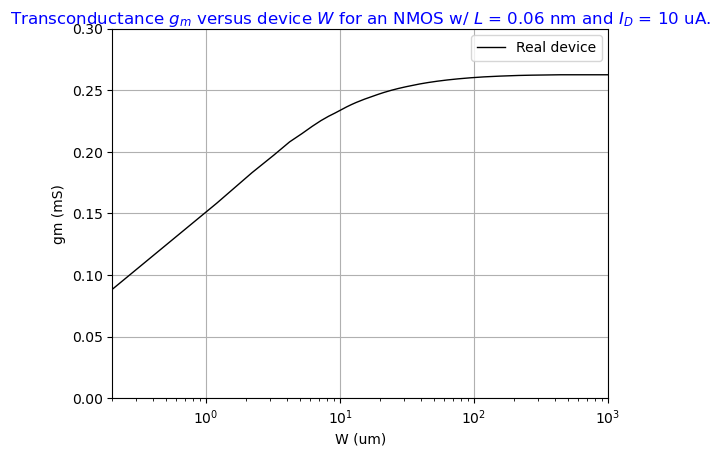

In [32]:
# data ============
ID = 10e-6
W = np.arange(0.2, 1010.1)
# print(np.shape(W))
# print(np.min(W))
# print(np.max(W))

# compute =====================
ID_W = ID / W
gm_ID = NCH.look_up('GM_ID', ID_W=ID_W) # uses default VDS = VDS_max/2, VSB = 0 and L = minimum L
gm_CGG = NCH.look_up('GM_CGG', ID_W=ID_W) # uses default VDS = VDS_max/2, VSB = 0 and L = minimum L
gm = gm_ID * ID
gm_W = gm / W

# plot ===============
plt.figure()
label1 = 'Real device'
plt.semilogx(W, gm * 1e3, 'k-', linewidth=1, label = label1)
plt.xlabel('W (um)')
plt.ylabel('gm (mS)')
plt.axis([min(W), max(W), 0, 0.30])
plt.grid(True)
plt.legend()
plt.title(f'Transconductance $g_m$ versus device $W$ for an NMOS w/ $L$ = {L_Min} nm and $I_D$ = 10 uA.', title_dict)

if save_Figs:
    dpi = 600
    fig_1_11_gm_Vs_W = filepath_dir_fig + f'\\Fig_1_11_gm_Vs_W_jba'
    print(f"Save Figure: {fig_1_11_gm_Vs_W}")
    plt.savefig(fig_1_11_gm_Vs_W + '.png', dpi = dpi, bbox_inches='tight')

plt.show()
# **************************************************************
# **************************************************************

**`Regardless of the above argument, operating deep in weak inversion can still be attractive for ultra-low power circuits that tend to have no significant speed constraints and, for example, operate in the nanoampere regime.`**  
  
**The current density-driven sizing approach described in Chapter 3 covers this specific application scenario.**



## `Examples of plots for an NMOS using its LUT:`

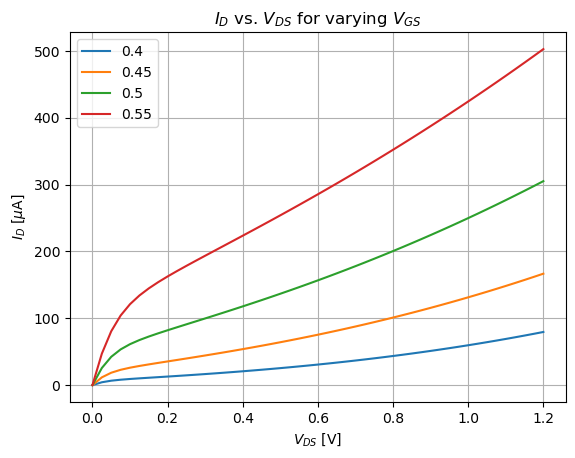

In [33]:
# %%
# Plot ID versus VDS
ID = NCH.look_up('ID', vds=VDSs, vgs=VGSs)
plt.figure()
plt.plot(VDSs, 1e6*ID.T)
plt.ylabel(r"$I_D$ [$\mu$A]")
plt.xlabel(r"$V_{DS}$ [V]")
plt.title(r'$I_D$ vs. $V_{DS}$ for varying $V_{GS}$')
plt.legend(VGSs)
plt.grid(True)
plt.show()

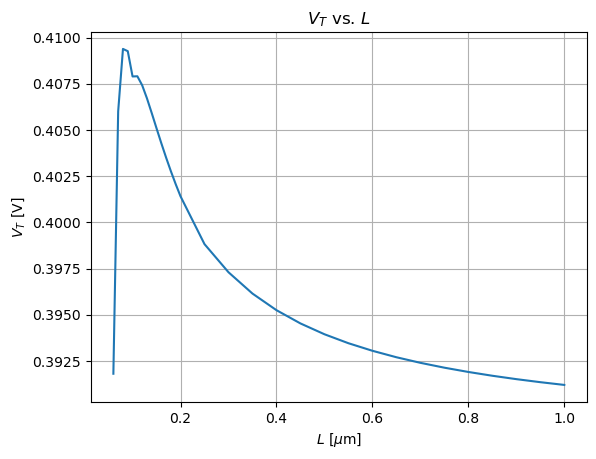

In [34]:
# %%
# plot Vt against L
Ls = NCH['L']
vt = NCH.look_up('VT', vgs=0.6, L=Ls)
plt.figure()
plt.plot(Ls, vt.T)
plt.ylabel(r"$V_T$ [V]")
plt.xlabel(r"$L$ [$\mu$m]")
plt.title(r'$V_T$ vs. $L$')
plt.grid(True)
plt.show()

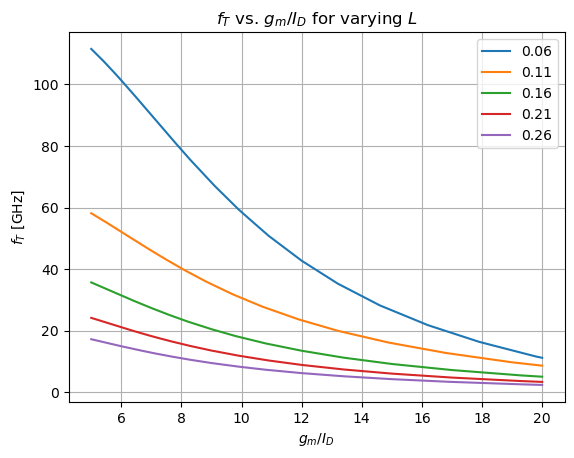

In [35]:
# %%
# Plot ft against gm_id for different L
step = 0.1
gm_ids = np.arange(5, 20+step, step)
Ls = np.arange(min(NCH['L']),0.3,0.05)
ft = NCH.look_up('GM_CGG', GM_ID=gm_ids, L =np.arange(min(Ls),0.3,0.05))/2/np.pi
plt.figure()
plt.plot(gm_ids, 1e-9*ft.T)
plt.ylabel(r"$f_T$ [GHz]")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$f_T$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.grid(True)
plt.show()

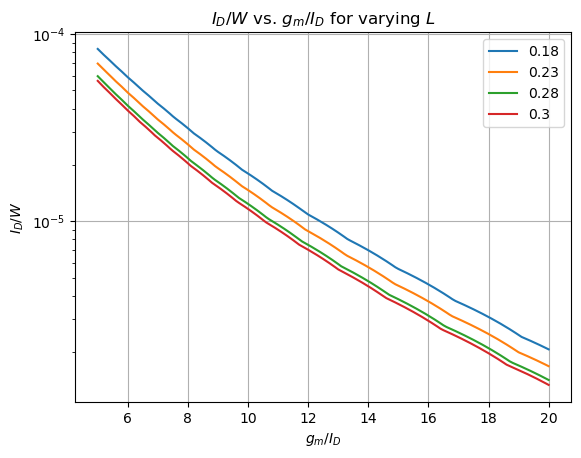

In [36]:
# %%
# Plot id/w against gm_id for different L
gm_ids = np.arange(5, 20+0.1, 0.1)
step = 0.05
Ls = [0.18, 0.23, 0.28, 0.3]
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, L=Ls)
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.grid(True)
plt.show()

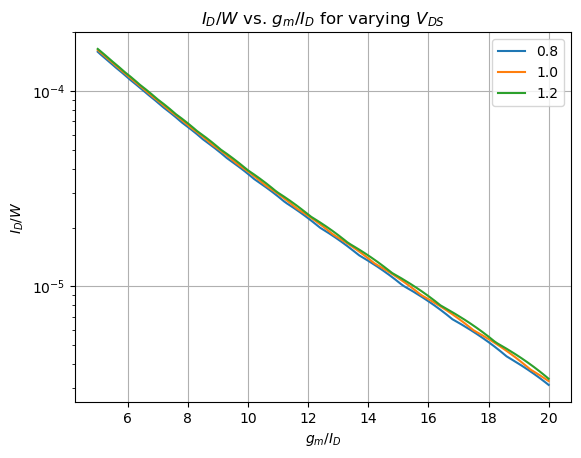

In [37]:
# %%
# Plot id/w against gm_id for different VDS (at minimum L)
gm_ids = np.arange(5, 20+0.1, 0.1)
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, VDS=[0.8, 1.0, 1.2])
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $V_{DS}$')
plt.legend([0.8, 1.0, 1.2])
plt.grid(True)
plt.show()

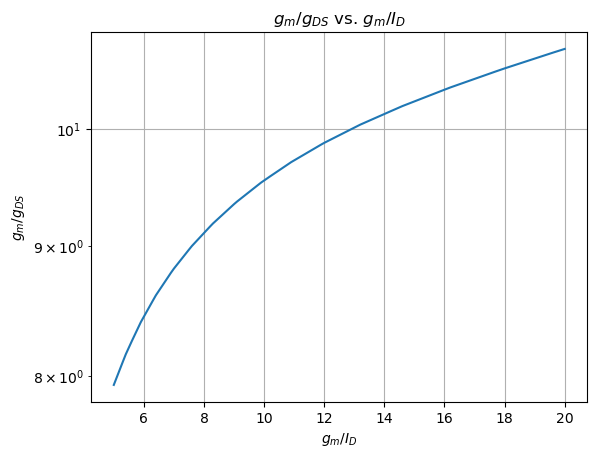

In [38]:
# %%
# Plot gm/gds against gm_id (at minimum L and default VDS)
gm_ids = np.arange(5, 20+0.1, 0.1)
gm_gds = NCH.look_up('GM_GDS', GM_ID=gm_ids)
plt.figure()
plt.semilogy(gm_ids, gm_gds.T)
plt.ylabel(r"$g_m/g_{DS}$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$g_m/g_{DS}$ vs. $g_m/I_D$')
plt.grid(True)
plt.show()


https://www.codeconvert.ai/matlab-to-python-converter
  
https://chat.openai.com/c/88f11184-cc55-460e-b0e6-d3d0e7df732e
